In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import scipy.sparse as sp
flight_df = sns.load_dataset('flights')
flight_df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [16]:
#view the last slot
#get number of entries
print(len(flight_df))
flight_df.tail()
#get the shape
print("Shape of the data", flight_df.shape)
flight_df.info()
flight_df.describe()

144
Shape of the data (144, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


Understanding Trend Aalysis with Line Plots

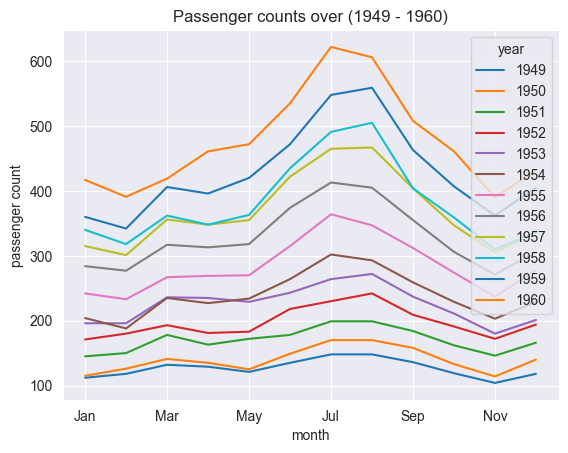

In [17]:
#pivot the Data frame to get the month as the index
df_pivot = flight_df.pivot(index='month', columns='year', values='passengers' )
df_pivot.plot(title="Passenger counts over (1949 - 1960)")
plt.ylabel("passenger count")
plt.show()


Aviating with Colors: Customizing Line plots

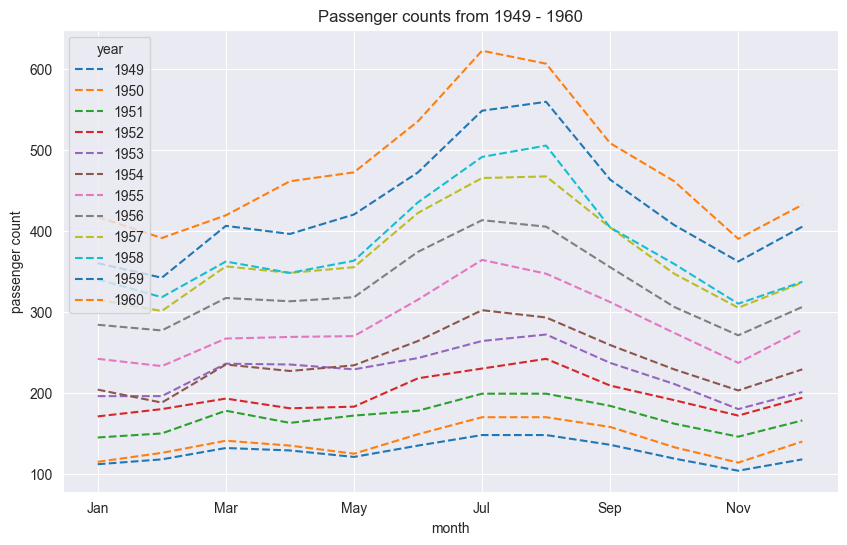

In [18]:
#figsize to adjust the size of the plot
#grid : sets to display grids
#line style : changes the style of the line
df_pivot.plot(grid=True, figsize=(10,6), linestyle='--')
plt.title("Passenger counts from 1949 - 1960")
plt.ylabel("passenger count")
plt.show()

Observing the trend of the month of July from 1949 to 1960

Text(0.5, 0, 'Year')

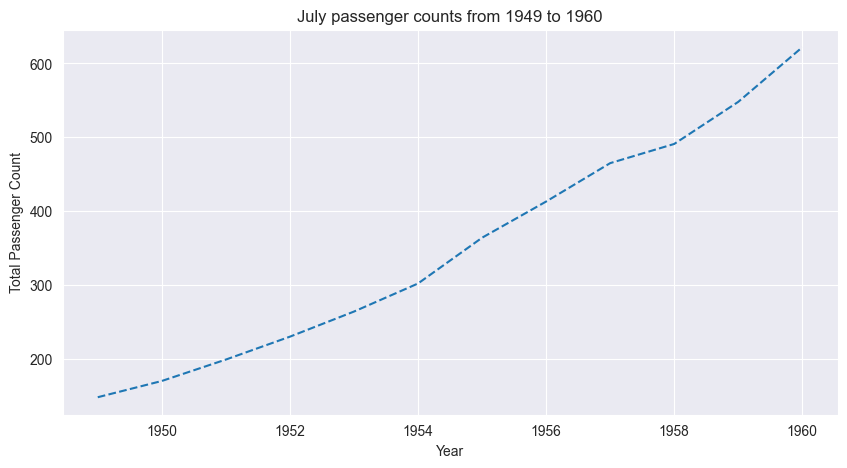

In [19]:
#filtering the month of July
july_data = flight_df[flight_df['month'] == 'Jul']

flights_pivots = july_data.pivot(index='month', columns='year', values="passengers")
#getting the total passenger counts for each year
yearly_total = flights_pivots.sum()
#create the line plot to analyze the total passenger count for each month in a year
yearly_total.plot(grid=True, figsize=(10,5),linestyle='--')
#assign titles
plt.title("July passenger counts from 1949 to 1960")
plt.ylabel("Total Passenger Count")
plt.xlabel("Year")

Analyzing and Visualizing Seasonal Fluctuations with Pythons With Time series
Application in airline Operations, Travel industry etc

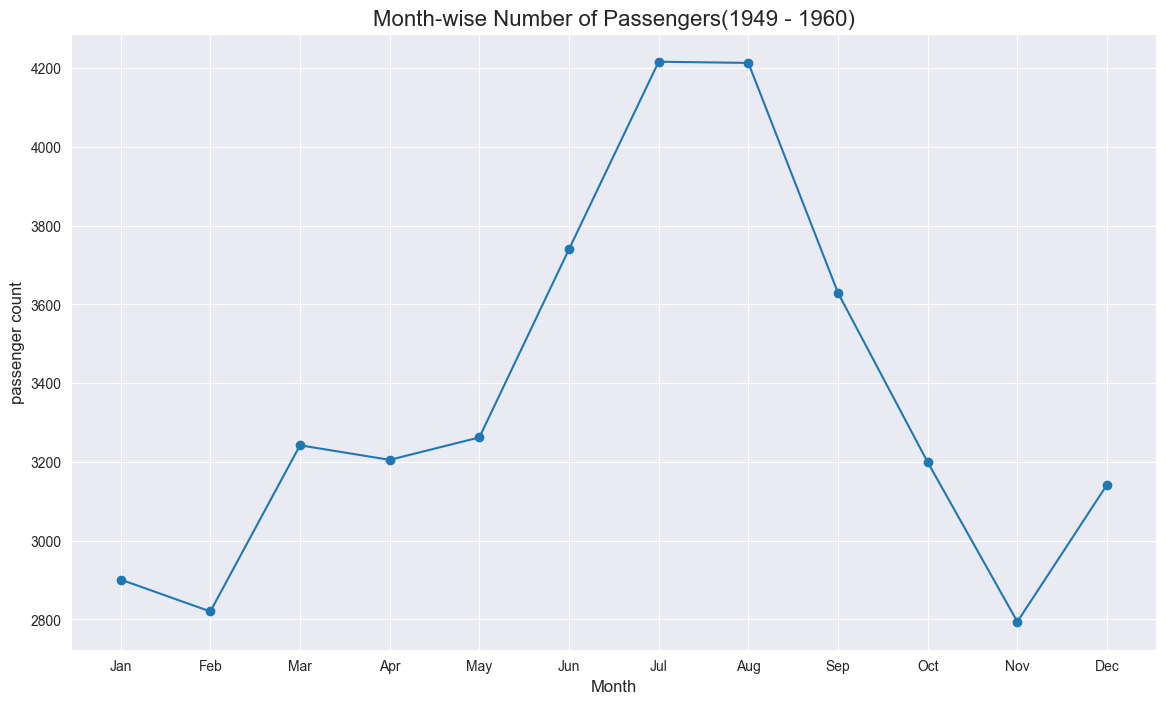

In [20]:
#aggregate Passenger's count for each month
#group the flights data by month column and sum up the passengers and rest the index of the month as column
month_wise_data = flight_df.groupby('month', observed=True)['passengers'].sum().reset_index()
#create a line plots
plt.figure(figsize=(14,8))
#month as x axis and passengers as y -axis
plt.plot(month_wise_data['month'], month_wise_data['passengers'], marker='o')
plt.grid(True)
plt.title('Month-wise Number of Passengers(1949 - 1960)', fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("passenger count", fontsize=12)
plt.show()

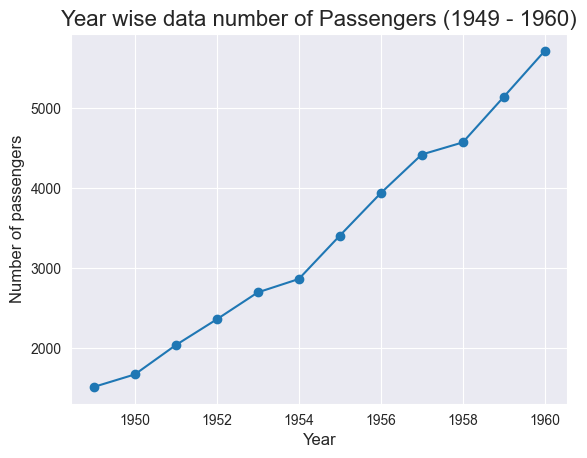

In [21]:
#year wise passenger distribution
year_wise_data= flight_df.groupby('year', observed=True)['passengers'].sum()
year_wise_data.plot(kind='line', marker='o')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of passengers", fontsize=12)
plt.title("Year wise data number of Passengers (1949 - 1960)", fontsize=16)
plt.grid(True)
plt.show()

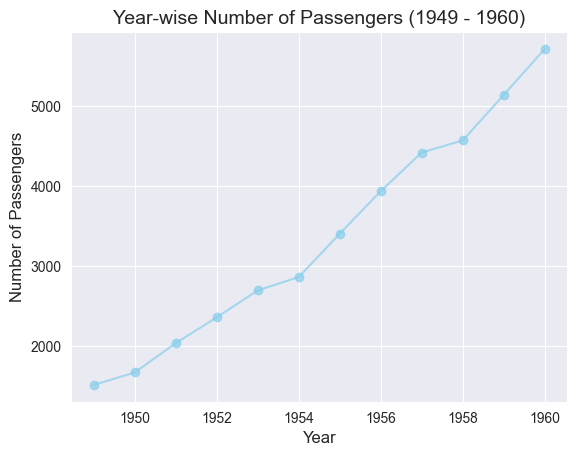

In [22]:
#customizing our plot
year_wise_data.plot(kind='line', marker='o', color='skyblue', alpha=0.7, grid=True)
plt.xlabel('Year', fontsize=12)
plt.ylabel("Number of Passengers", fontsize=12)
plt.title("Year-wise Number of Passengers (1949 - 1960)", fontsize=14)
plt.show()

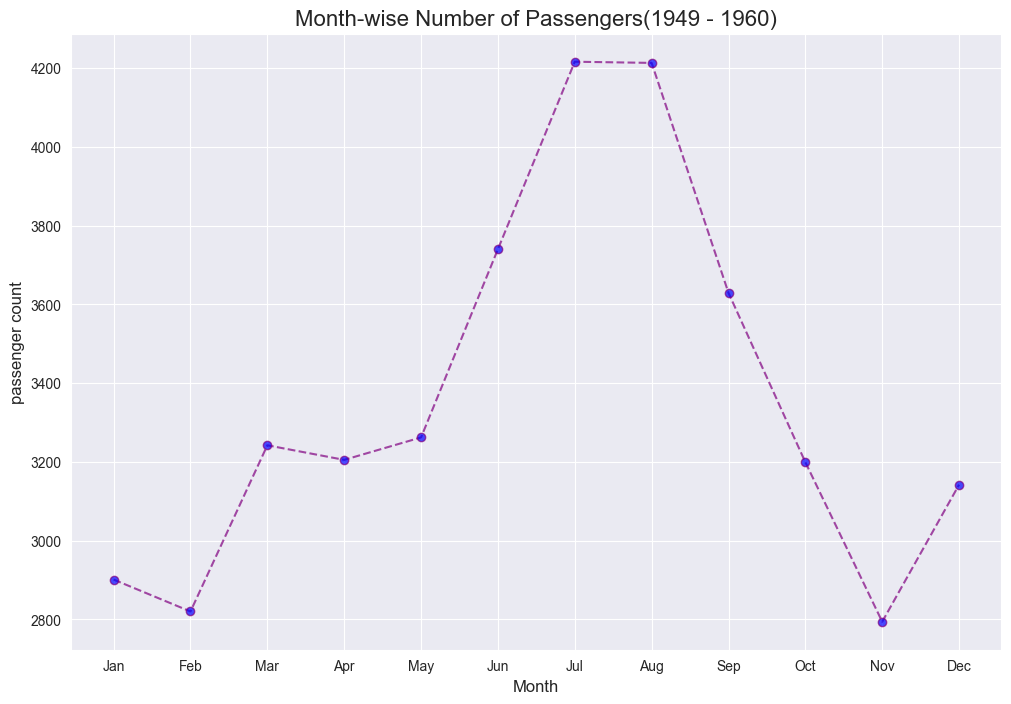

In [23]:
plt.figure(figsize=(12,8))
plt.plot(month_wise_data['month'], month_wise_data['passengers'], color='purple',
         linestyle='dashed', marker='o', markerfacecolor='blue', alpha=0.7)
plt.title('Month-wise Number of Passengers(1949 - 1960)', fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("passenger count", fontsize=12)
plt.show()

HEATMAPS
Heatmaps are used to display multivariate datasets in a two-dimensional image
They visually represent data through colors


In [24]:
#pivot the dataset
flights_pivot1 = flight_df.pivot(index='month',columns='year',values='passengers')
print(flights_pivot1)

year   1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  1960
month                                                                        
Jan     112   115   145   171   196   204   242   284   315   340   360   417
Feb     118   126   150   180   196   188   233   277   301   318   342   391
Mar     132   141   178   193   236   235   267   317   356   362   406   419
Apr     129   135   163   181   235   227   269   313   348   348   396   461
May     121   125   172   183   229   234   270   318   355   363   420   472
Jun     135   149   178   218   243   264   315   374   422   435   472   535
Jul     148   170   199   230   264   302   364   413   465   491   548   622
Aug     148   170   199   242   272   293   347   405   467   505   559   606
Sep     136   158   184   209   237   259   312   355   404   404   463   508
Oct     119   133   162   191   211   229   274   306   347   359   407   461
Nov     104   114   146   172   180   203   237   271   305   31

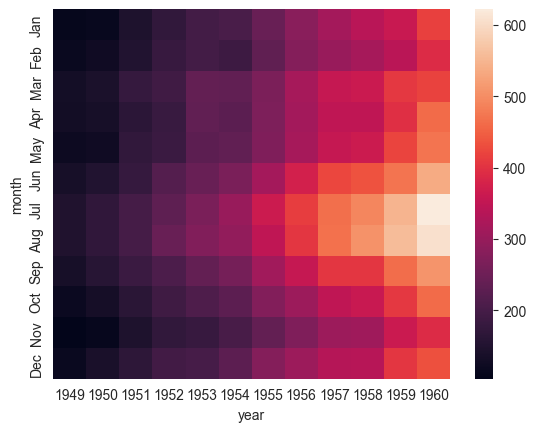

In [25]:
#create the heatmap
sns.heatmap(flights_pivot1)
#color gradient (warmer for higher values, color for lower values
plt.show()

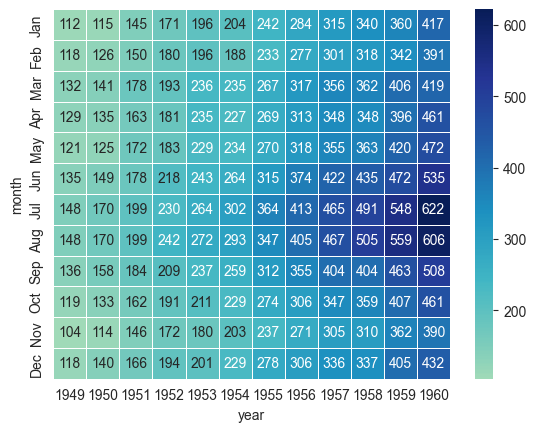

In [26]:
#customizing HeatMaps
#cmap: controls the colormap for the heatmap
#annot: if set True, data values will be written to each cell
#fmt: String formating used when annot is set to True
#linewidths: allows adding lines between each cell in the heatmap
#cbar: allows adding color to the bar when set to true
#center: defines the value at which to center the heatmap
sns.heatmap(flights_pivot1, cmap="YlGnBu",#choosing a yellow-green-blue colormap
            annot=True, #Turnning on annotation
            fmt='d', #display the annotations as integers
            linewidth=.5, #add gridlines with a wdith of 0.5
            cbar=True, #include color bar
            center=flights_pivot1.loc["Jan", 1955] #center values around january 1955
            )
plt.show()

Linear Regression a powerful tool used to predict an outcome (dependent variable)
based on one or more predictor(independent)variables forming a linear relationship
it can be represented as y = a + b*x, y is dependent variable we want to predict, x is our predictor variablem a is the y intercept and b is the slope of the line, y = number of passengers, x represent time(years or months)

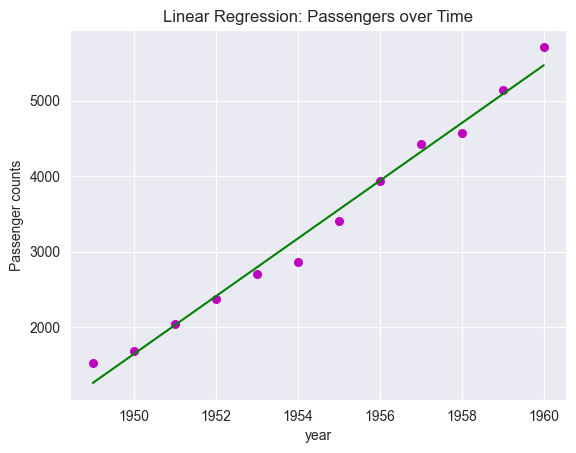

In [37]:
#convert year column to pandas dateformat
flight_df['year'] = pd.to_datetime(flight_df['year'], format="%Y")
#calculate the sum of passengers for each year
flight_pivots2 = pd.pivot_table(data=flight_df, values='passengers', index='year', aggfunc='sum')
#convert a year from index to a column if it is part of index
flight_pivots2.reset_index(inplace=True)

#extracting the year from dta and convert it to appropriate format
flight_pivots2['year'] = flight_pivots2['year'].dt.year
x = np.array(flight_pivots2['year']).reshape(-1,1)
y= flight_pivots2['passengers']
reg = LinearRegression().fit(x,y)
#plot a scatter plot
plt.scatter(x, y, color='m',marker='o', s=30)
y_pred = reg.predict(x)
plt.plot(x, y_pred, color='g')
plt.xlabel('year')
plt.ylabel("Passenger counts")
plt.title("Linear Regression: Passengers over Time")
plt.show()

In [38]:
#calculate R-Squared Statistics
#R_squared provide the proportion of the variance for a dependent variable explained by an independent variables in linear regression model
print("R-Squared statistics ", reg.score(x,y)) #the closer the r_squared to 1, the better the model

R-Squared statistics  0.9866055381778157


Year       Predicted passengers     
1961                            5853
1962                            6236
1963                            6619
1964                            7002
1965                            7386
1966                            7769
1967                            8152
1968                            8535
1969                            8918
1970                            9301
1971                            9684
1972                           10067
1973                           10450
1974                           10833
1975                           11216
1976                           11599
1977                           11983
1978                           12366
1979                           12749
1980                           13132
1981                           13515
1982                           13898
1983                           14281
1984                           14664
1985                           15047
1986                           15430
1

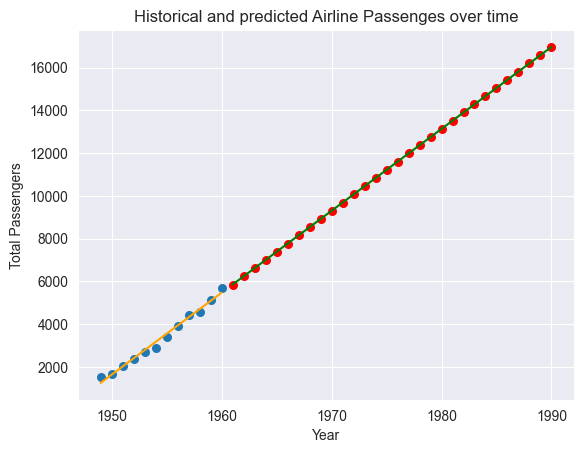

In [42]:
#forecast travers in 30 years
new_years = np.array(range(1961, 1991)).reshape(-1,1)
new_passengers = reg.predict(new_years)
print(f"{'Year':<10s} {'Predicted passengers': <25s}")
#combine new_years and new_passengers into pairs of value and loop through them
for year, passengers  in zip(new_years, new_passengers):
    print(f"{year[0]:<10d} {int(passengers): 25d}")
plt.scatter(x, y , marker='o', s=30)
plt.plot(x, reg.predict(x), color='orange')
plt.scatter(new_years,new_passengers, color='red', s=30)
plt.plot(new_years, new_passengers, color='green')
#set the label and title
plt.xlabel("Year")
plt.ylabel('Total Passengers')
plt.title("Historical and predicted Airline Passenges over time")

#show the plot
plt.show()